In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gap_complexity_utils as gaps
from gap_complexity_utils import EnsemblePair, SimulationPair

In [2]:
rng_seed = 144

In [ ]:
ensemble = EnsemblePair(100, 5, og_inc=10.0, rng_seed=rng_seed)
ensemble.sample("grid")
ensemble.run()

pers = np.empty((ensemble.num_simulations,))
for ii, pair in enumerate(ensemble.pairs.ravel()):
    pers[ii] = pair.longest_secular_period() / pair.min_dynamical_timescale
pers

In [19]:
def multiple_simulation_times(times, m=1.0e-2, a=3.75, og_inc=10., N=4, makeplot=True):
    gc_diffs = np.empty(times.shape)
    for ii, t in enumerate(times):
        # print(f"%f times the innermost orbit." % t)
        simpair = SimulationPair(
            N, og_inc=og_inc, simulation_time=t, rng_seed=rng_seed
        )
        simpair.add(m, a)
        simpair.get_ll_systems()
        simpair.get_ll_solutions()
        simpair.get_gap_complexities()
        gc_diffs[ii] = simpair.mean_gc_with - simpair.mean_gc_wout
        # print(f"Average gap complexity change: %f." % gc_diffs[ii])
        if makeplot:
            simpair.plot()
        # print()
    return gc_diffs

def time_dependence_plot(times, smas, m=1.0e-2, N=4, og_inc=10.):
    fig, ax = plt.subplots(1, 1, dpi=200)
    ax.axvline(np.log10(5.0e4), c="k", ls="dashed", alpha=0.3)
    for a in smas:
        gc_diffs = multiple_simulation_times(times, m, a, og_inc, N, makeplot=False)
        ax.plot(np.log10(times), gc_diffs, "-o", label=f"$a = %i$" % int(np.round(a)))
    ax.set_xlabel("log(simulation time)")
    ax.set_ylabel(
        r"$\langle \tilde{\mathcal{C}}_2 \rangle - \langle \tilde{\mathcal{C}}_1 \rangle$"
    )
    ax.set_ylim(-0.01, 0.08)
    ax.legend(loc="upper left", ncol=5, fontsize=8)
    # fig.savefig("gc-change-time-dependence.pdf")
    return

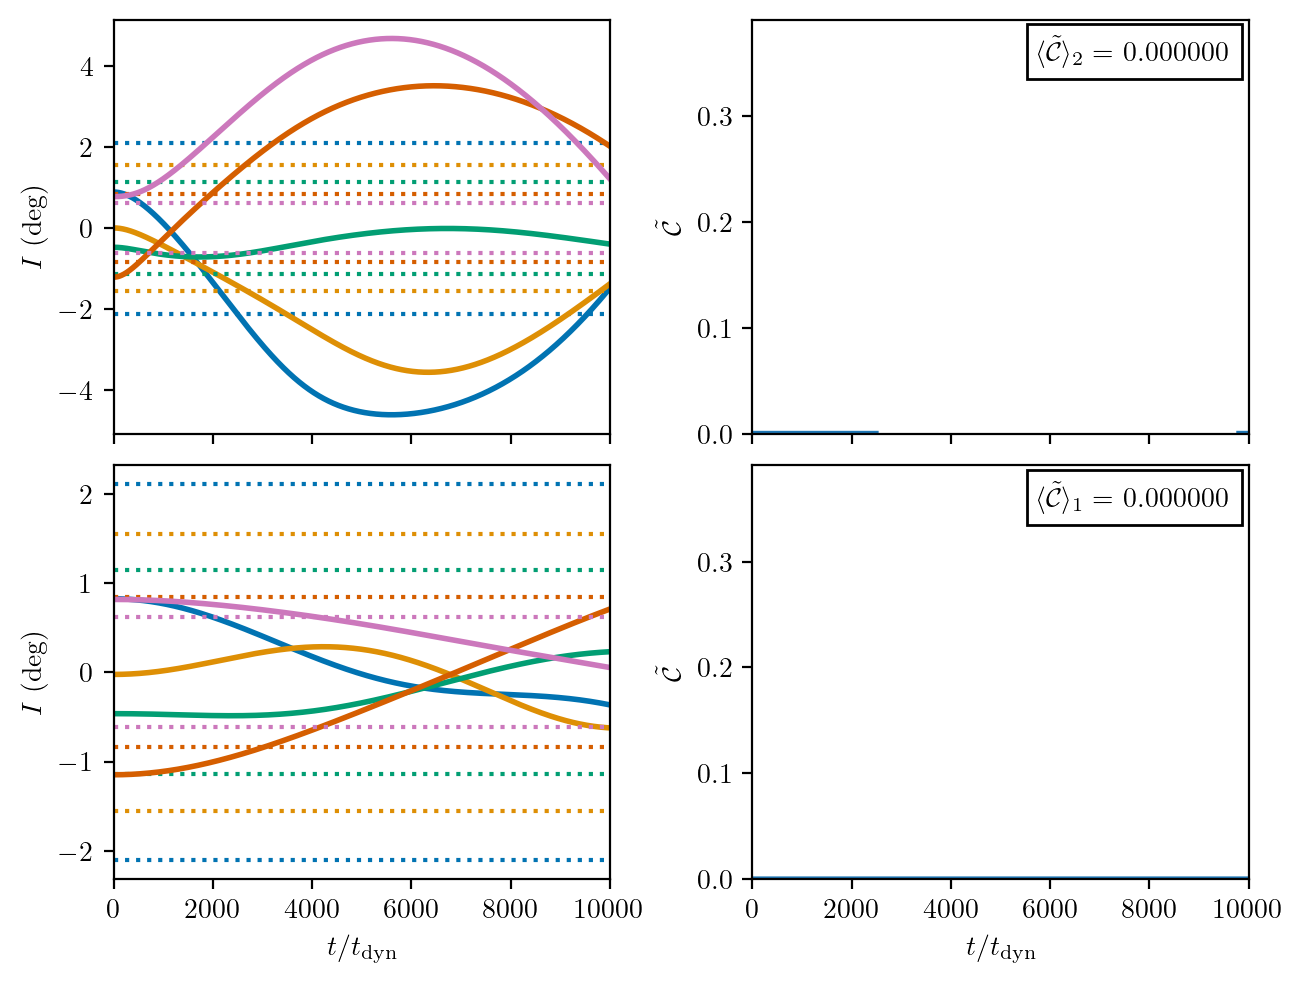

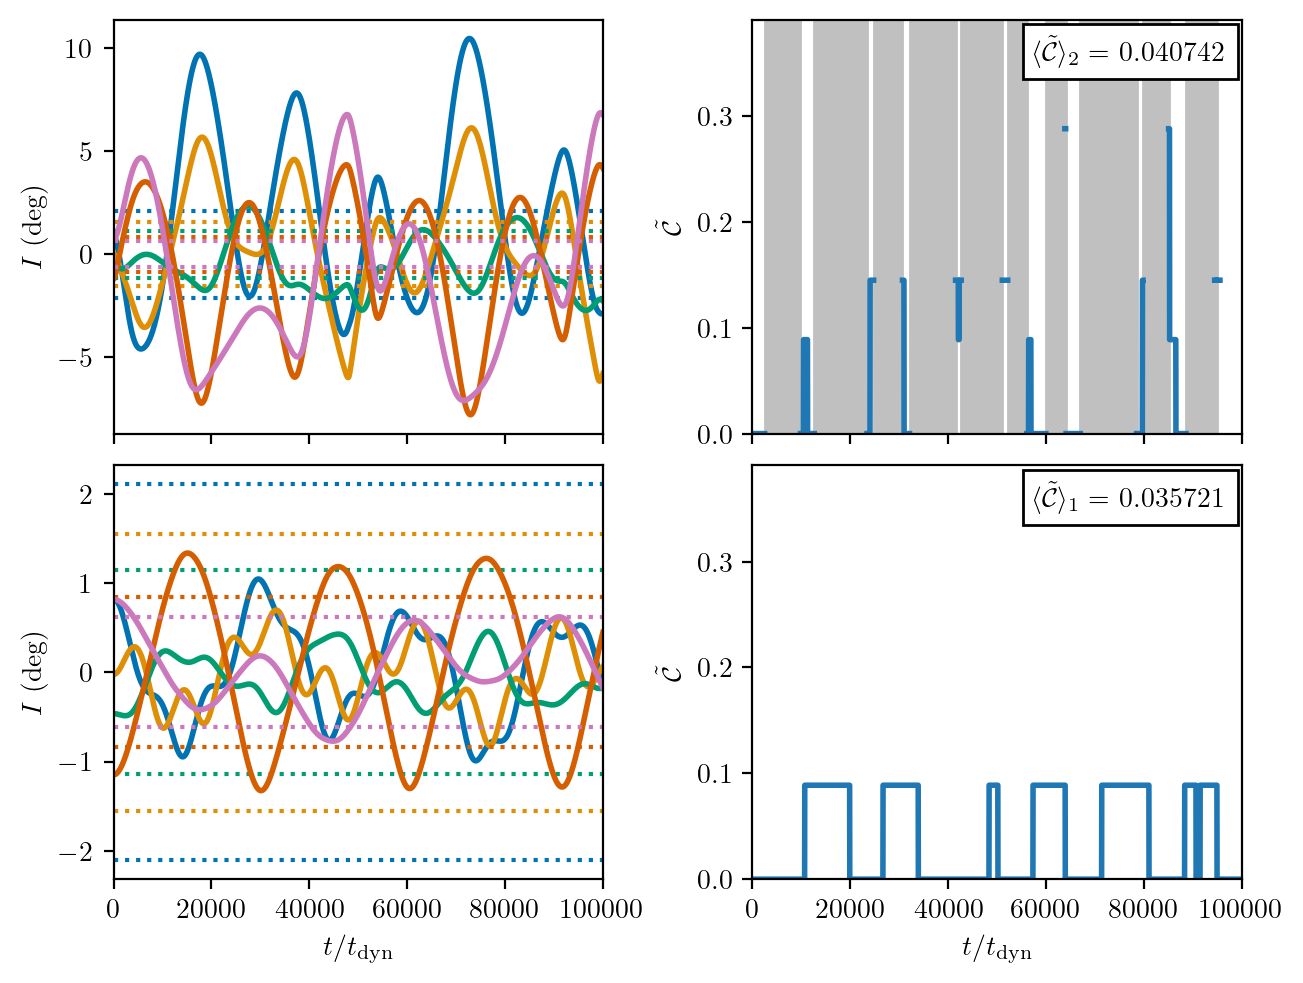

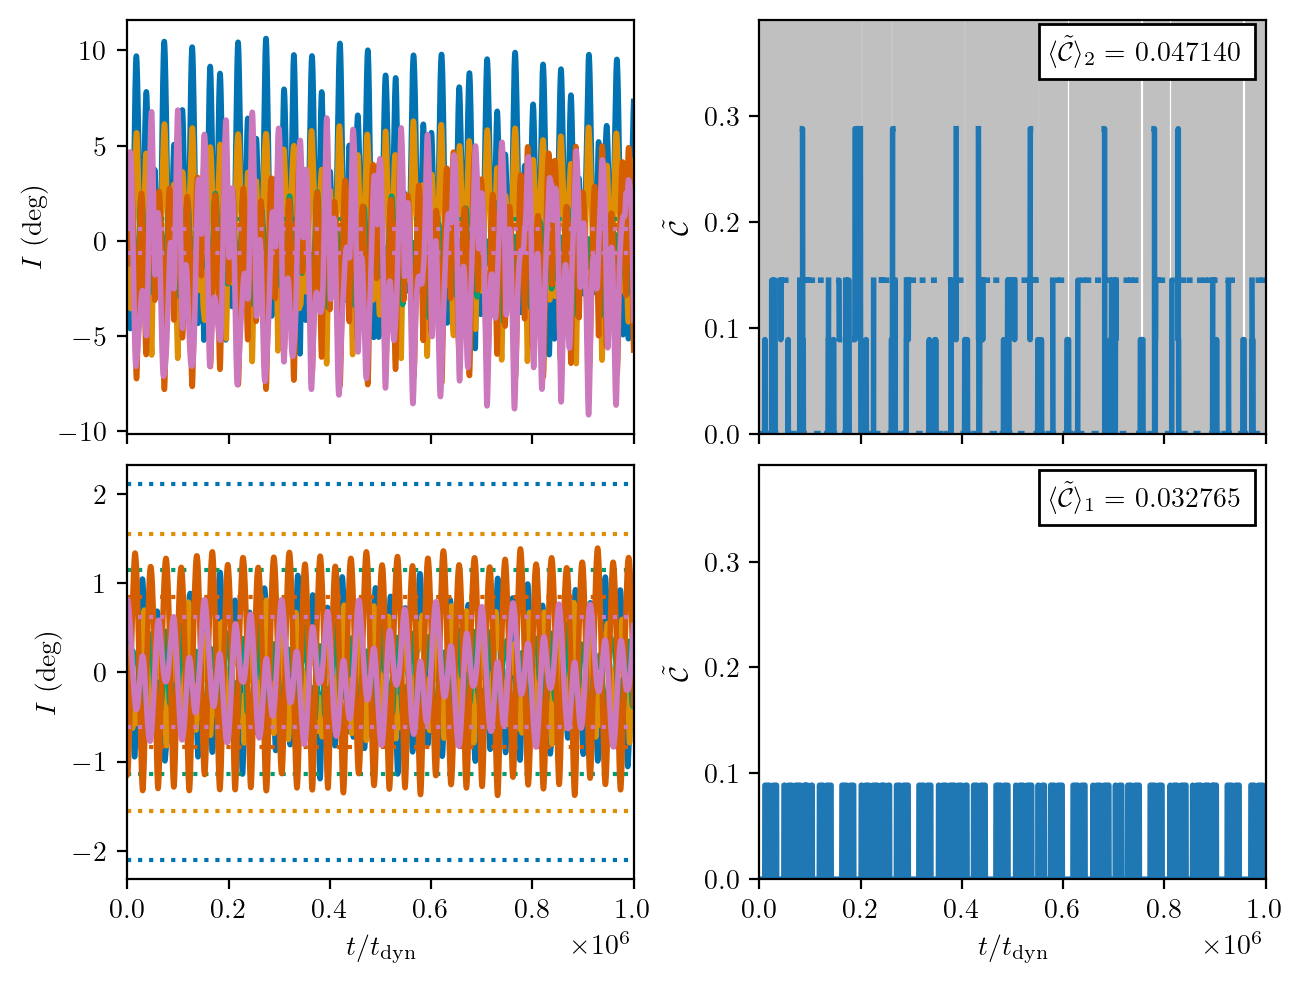

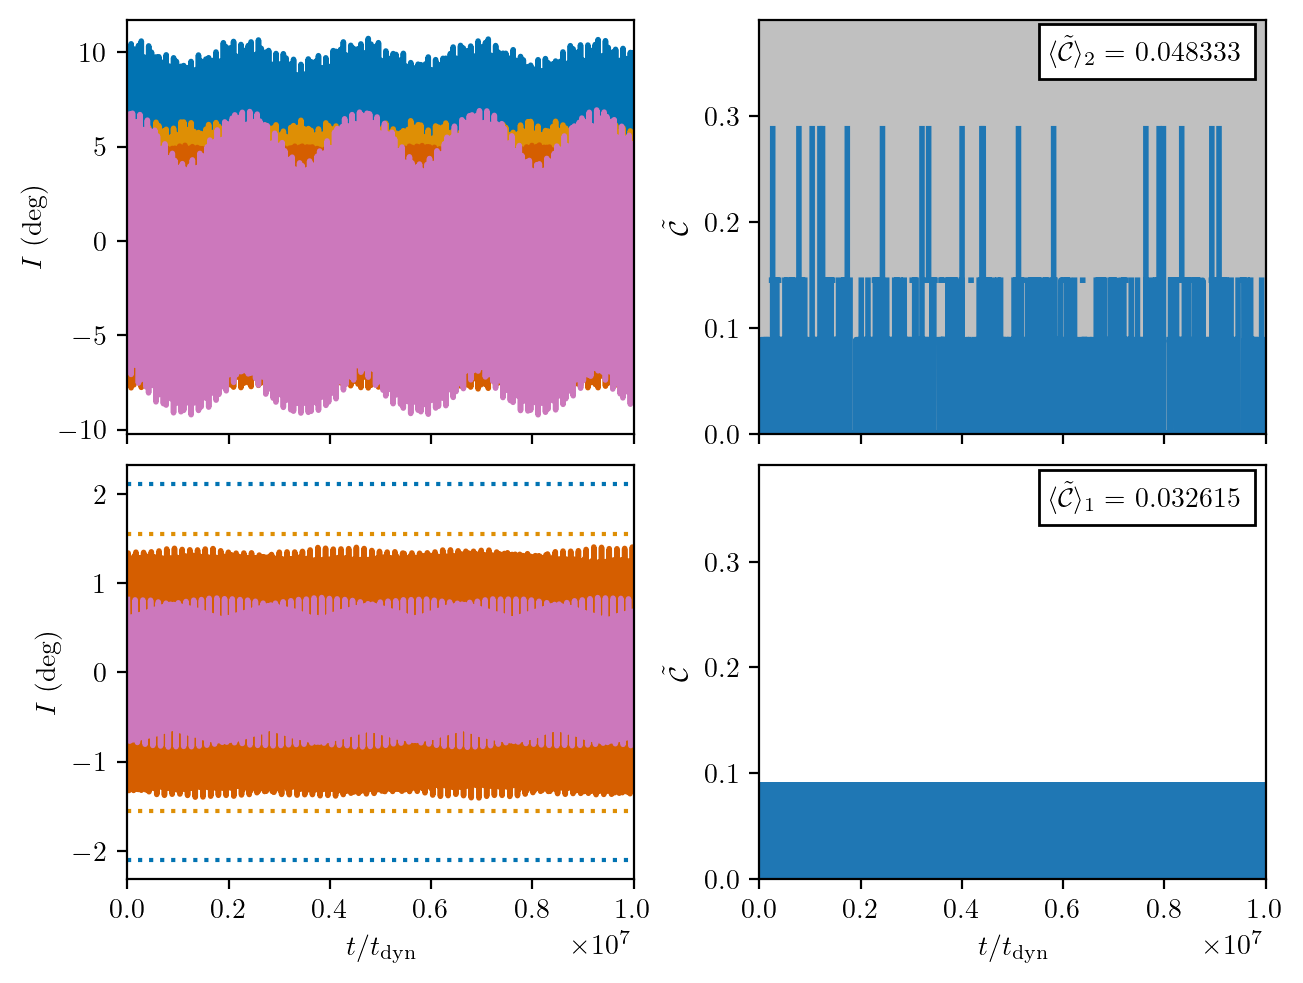

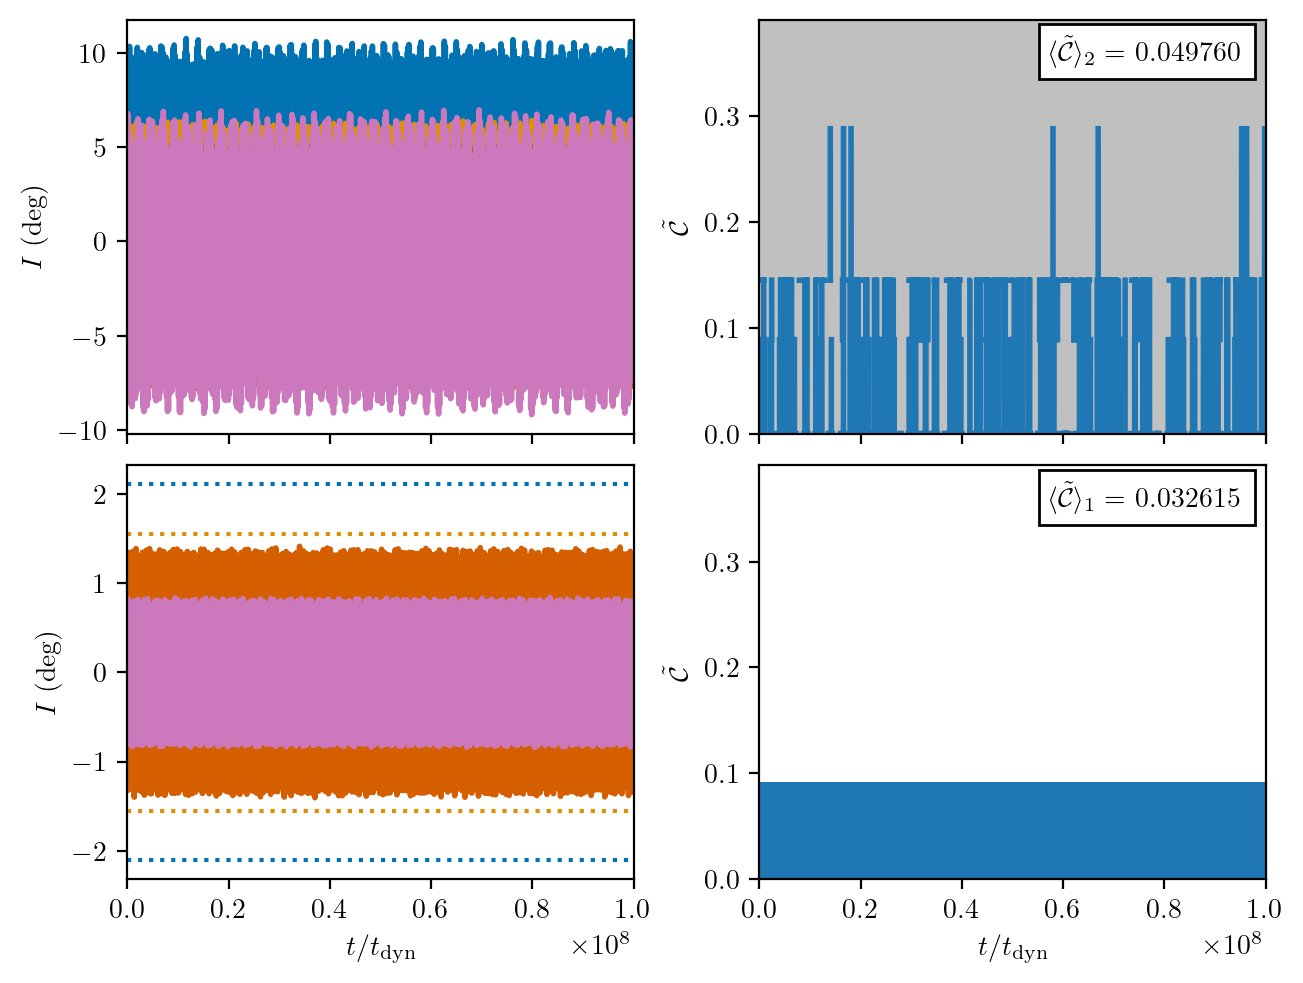

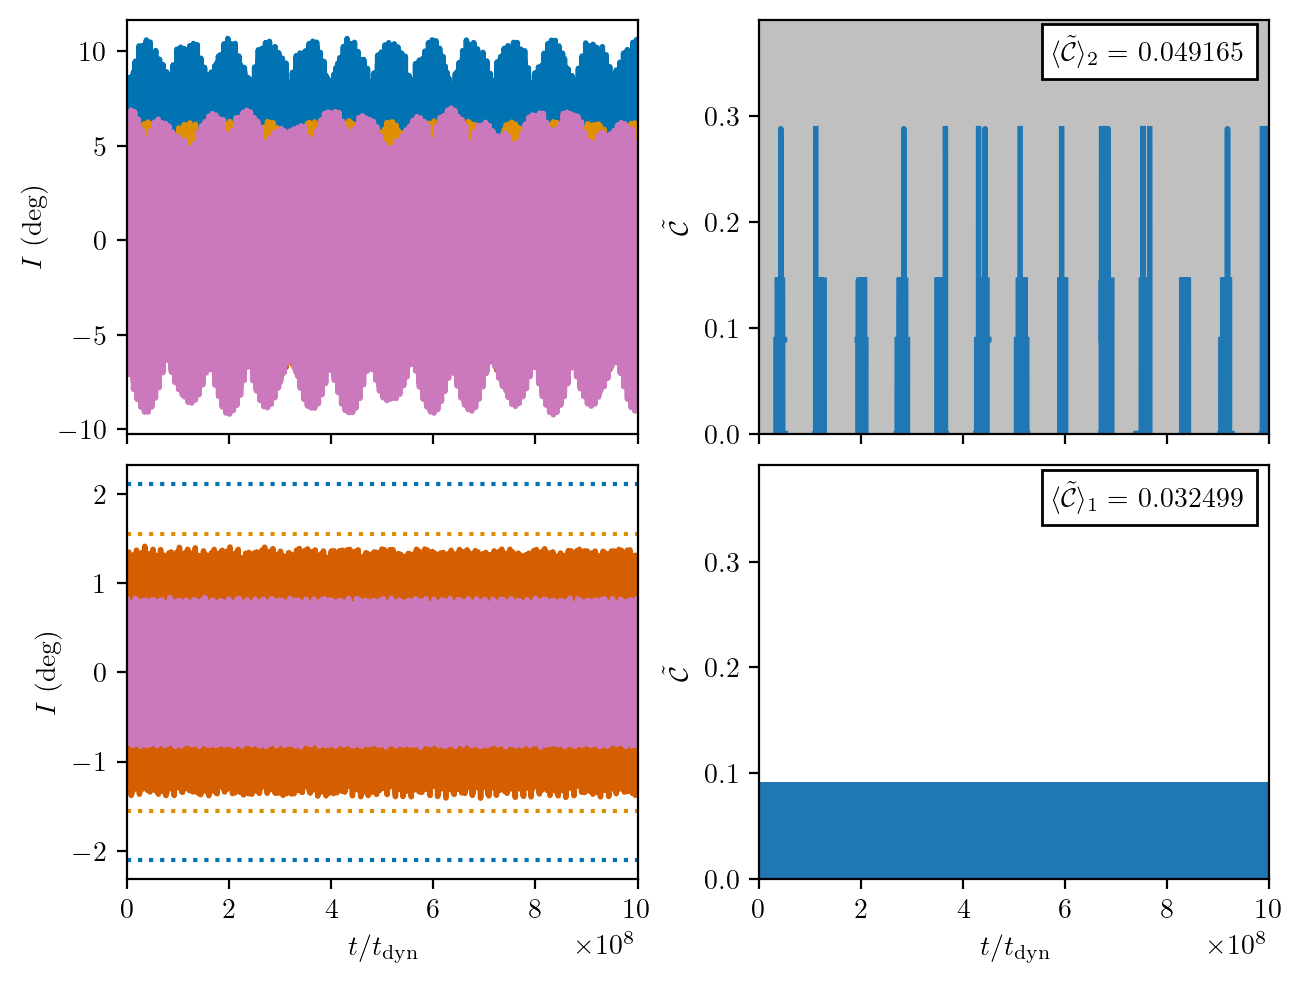

In [14]:
times = np.logspace(4., 9., 6)
multiple_simulation_times(times, m=0.1, a=4.0, N=5);

In [17]:
times = np.logspace(4., 9., 60)
smas = np.linspace(1., 10., 10)

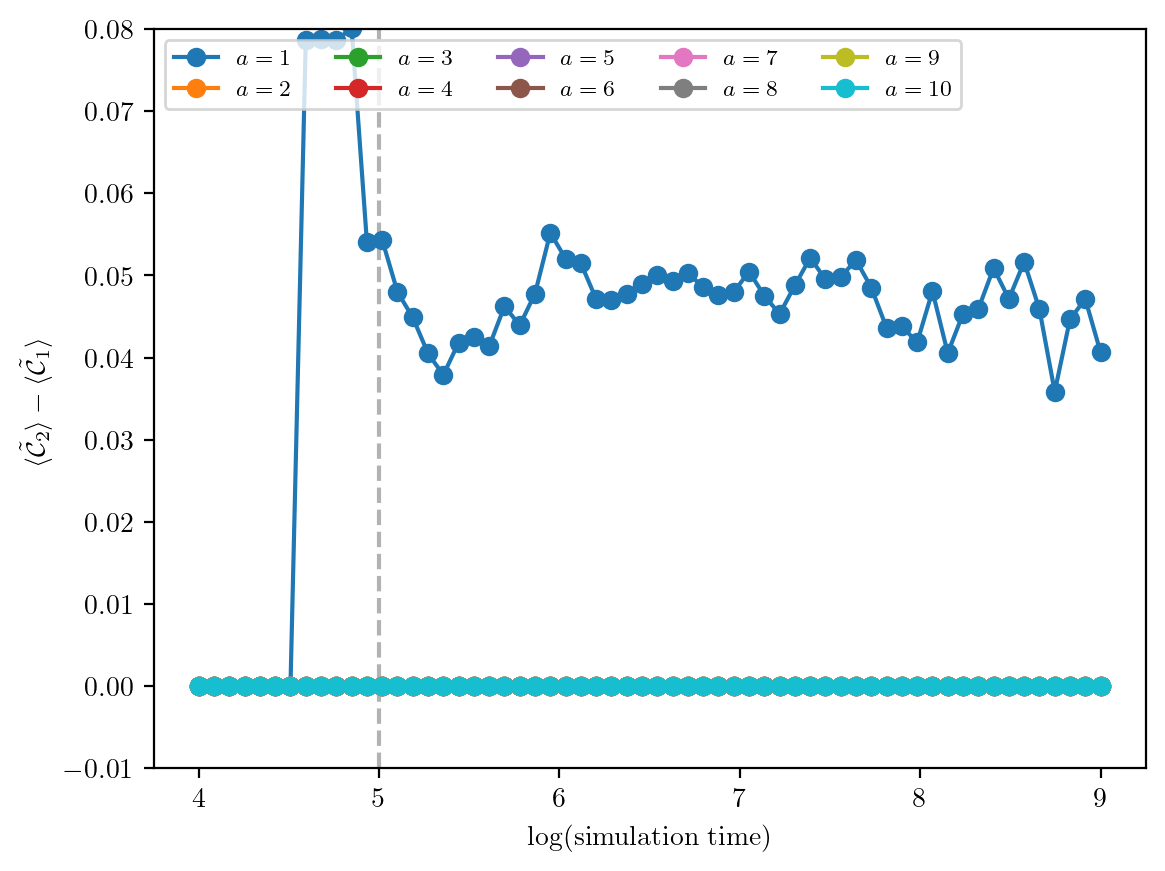

In [84]:
time_dependence_plot(times, smas, m=1.0e-3)

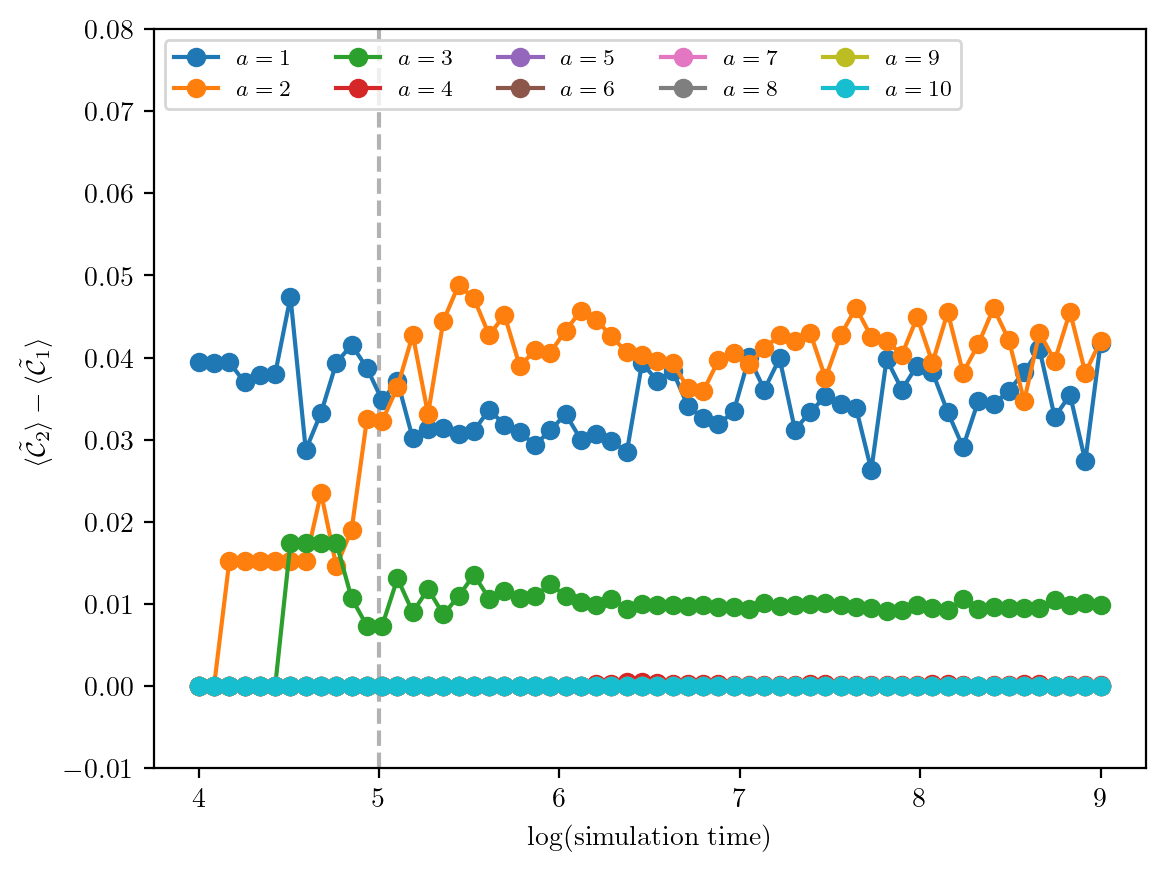

In [85]:
time_dependence_plot(times, smas, m=1.0e-2)

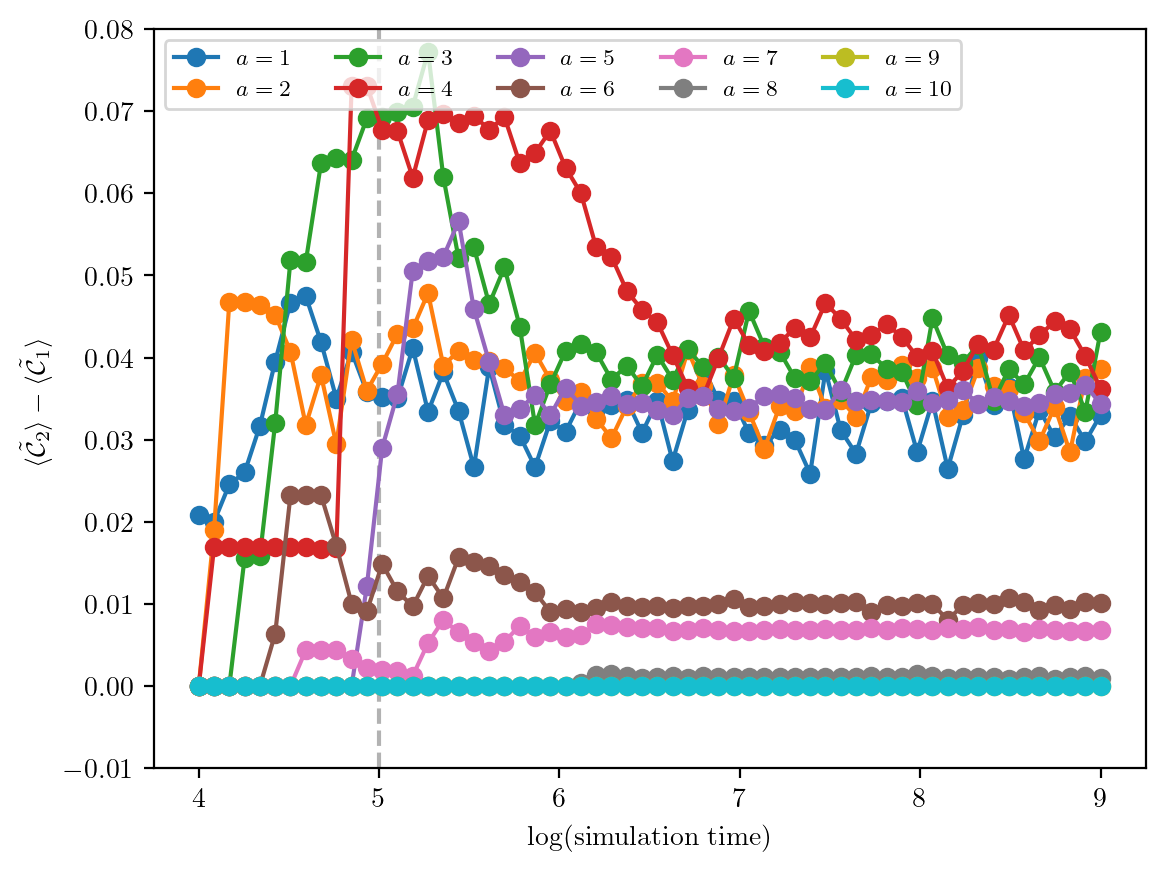

In [86]:
time_dependence_plot(times, smas, m=0.1)

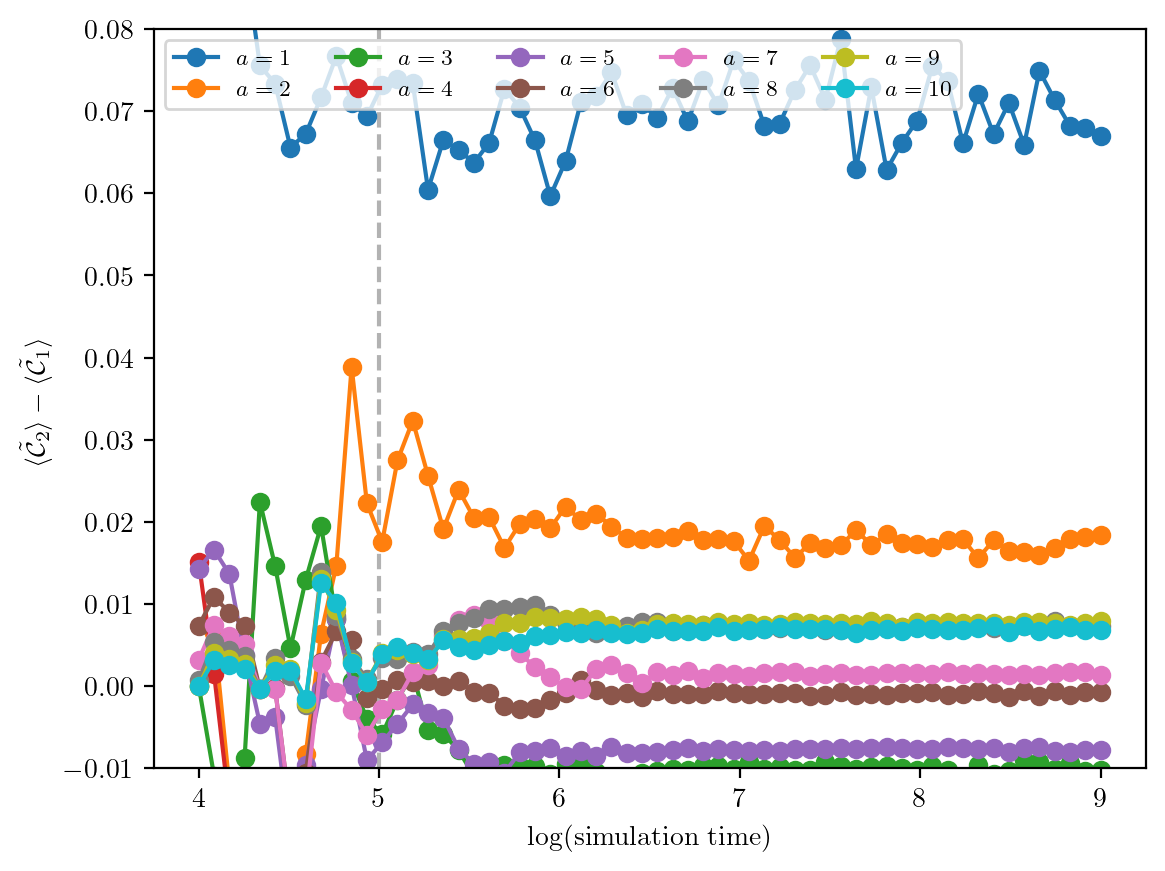

In [18]:
time_dependence_plot(times, smas, m=1.0e-2, N=5)